In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df =pd.read_pickle('shared/Project-3_NYC_311_Calls.pkl')

In [8]:
df = df.set_index(pd.DatetimeIndex(df['Created Date']))

del df['Created Date']

In [9]:
df

,Unique Key,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Open Data Channel Type
Created Date,,,,,,,,,,,
2011-04-06 00:00:00,20184537,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10002.0,NEW YORK,More than one complaint was received for this ...,MANHATTAN,UNKNOWN
2011-04-06 00:00:00,20184538,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11236.0,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,UNKNOWN
2011-04-06 00:00:00,20184539,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN
2022-07-08 11:14:43,54732265,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,10467.0,BRONX,The Department of Sanitation investigated this...,BRONX,PHONE
2011-04-06 00:00:00,20184540,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...
2011-04-06 00:00:00,20184532,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10468,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN
2011-04-06 00:00:00,20184533,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10018,NEW YORK,More than one complaint was received for this ...,MANHATTAN,UNKNOWN
2011-04-06 00:00:00,20184534,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,STAIRS,RESIDENTIAL BUILDING,10460,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN


In [10]:
distinct_values_count = df.nunique()

distinct_values_count

Unique Key                33780977
Agency                          36
Agency Name                   1888
Complaint Type                 485
Descriptor                    1933
Location Type                  230
Incident Zip                  3711
City                          2749
Resolution Description        1978
Borough                          6
Open Data Channel Type           5
dtype: int64

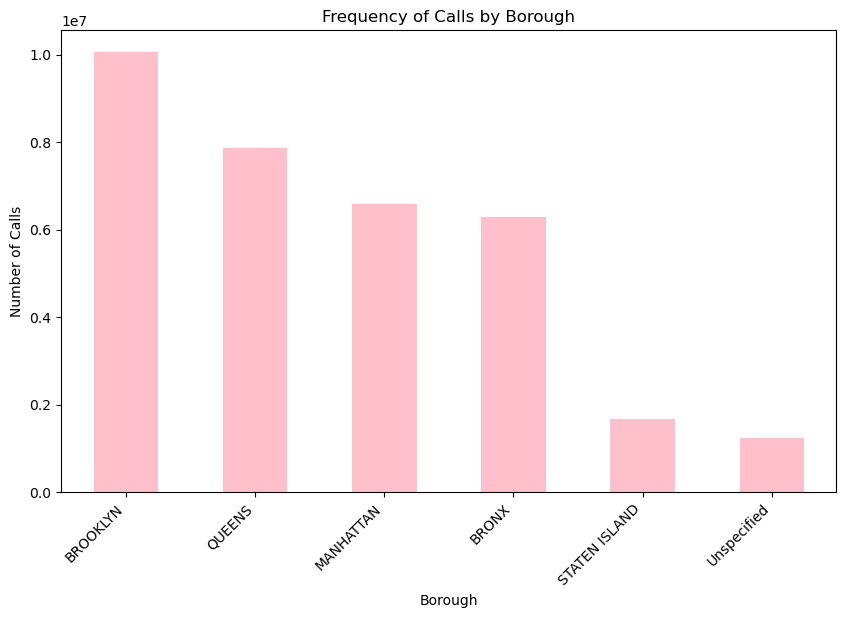

In [11]:
borough_counts = df['Borough'].value_counts()

# Plotting a bar graph
plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='pink')
plt.title('Frequency of Calls by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [12]:
# Filter data for the year 2022
df_2022 = df[df.index.year == 2022]

# Resample data to daily frequency and count the number of complaints for each day
daily_complaints_2022 = df_2022['Unique Key'].resample('D').count()

# Calculate the average number of daily complaints in 2022
average_daily_complaints_2022 = daily_complaints_2022.mean()

# Print the result
print("Average number of daily complaints received in 2022:", average_daily_complaints_2022)

Average number of daily complaints received in 2022: 8684.320547945206


In [13]:
# Count the number of complaints for each date
daily_complaints = df['Unique Key'].resample('D').count()

# Find the date with the maximum number of calls
date_with_max_calls = daily_complaints.idxmax()

# Find the maximum number of calls
max_calls = daily_complaints.max()

# Print the result
print("On", date_with_max_calls.strftime('%Y-%m-%d'), "the maximum number of calls (", max_calls, ") were received.")

On 2020-08-04 the maximum number of calls ( 24415 ) were received.


In [14]:
# Filter the DataFrame for the date with the maximum number of calls
max_calls_date_df = df[df.index.date == date_with_max_calls.date()]

# Find the most important complaint type on that date
most_important_complaint_type = max_calls_date_df['Complaint Type'].value_counts().idxmax()

# Print the result
print("On", date_with_max_calls.strftime('%Y-%m-%d'), "the most important complaint type was:", most_important_complaint_type)

On 2020-08-04 the most important complaint type was: Damaged Tree


In [17]:
monthly_complaints = df['Unique Key'].resample('ME').count()


In [18]:
monthly_complaints_by_month = monthly_complaints.groupby(monthly_complaints.index.month).sum()

In [19]:
quietest_month = monthly_complaints_by_month.idxmin()

In [20]:
quietest_month

12

In [22]:
import statsmodels.api as sm

In [24]:
# Resample data to daily frequency
daily_complaints = df['Unique Key'].resample('D').count()

# Perform ETS decomposition
result = sm.tsa.seasonal_decompose(daily_complaints, model='additive')

# Extract the seasonal component
seasonal_component = result.seasonal

# Find the value of the seasonal component on 2020-12-25
value_on_2020_12_25 = round(seasonal_component['2020-12-25'])

# Print the result
print("The value of the seasonal component on 2020-12-25 (rounded to the nearest integer) is:", value_on_2020_12_25)

The value of the seasonal component on 2020-12-25 (rounded to the nearest integer) is: 183


In [25]:
# Resample data to daily frequency
daily_complaints = df['Unique Key'].resample('D').count()

# Calculate the autocorrelation with a lag of 1
autocorrelation_lag_1 = daily_complaints.autocorr(lag=1)

# Print the result
print("The autocorrelation of the number of daily calls with the number of calls the day prior is:", autocorrelation_lag_1)

The autocorrelation of the number of daily calls with the number of calls the day prior is: 0.7517059728398577


In [33]:
# Resample data to daily frequency
daily_complaints = df['Unique Key'].resample('D').count().reset_index()

# Rename columns as required by Prophet
daily_complaints.columns = ['ds', 'y']

# Split the data into training and test sets
train_data = daily_complaints[:-90]
test_data = daily_complaints[-90:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_data)

# Create a DataFrame with the dates for the test set
future = model.make_future_dataframe(periods=90)

# Generate forecasts for the test set
forecast = model.predict(future)

# Extract the predicted values for the test set
y_pred = forecast[-90:]['yhat']

# Extract the actual values for the test set
y_true = test_data['y']

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_true, y_pred))

# Print the result
print("RMSE on the test set:", rmse)

17:45:39 - cmdstanpy - INFO - Chain [1] start processing
17:45:41 - cmdstanpy - INFO - Chain [1] done processing


RMSE on the test set: 1233.7823321393885


In [28]:
from prophet import Prophet

/opt/conda/envs/mggy8413/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
from math import sqrt

In [32]:
from sklearn.metrics import mean_squared_error